In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense,Input, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

# Step 1: Import the dataset.

In [74]:
# Load the dataset
# Defines the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
# Defines the names of columns in the dataset
column_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 
                'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 
                'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 
                'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 
                'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 
                'symmetry_worst', 'fractal_dimension_worst']
# loads the breast cancer dataset URL into a pandas DataFrame.
df = pd.read_csv(url, names=column_names)

In [75]:
# Display the first five rows of the data frame
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [76]:
#  Display the last five rows of the data frame
print(df.tail())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_w

In [77]:
# Check the number of rows and columns
df.shape

(569, 32)

In [78]:
# Explor the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [79]:
# Check the minimum and maximum values in each numerical column
numeric_columns = df.select_dtypes(include=np.number).columns
numeric_stats = df[numeric_columns].describe().loc[['min', 'max']]
numeric_stats

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
min,8670.0,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0000,0.0000,0.106,...,7.93,12.02,50.41,185.2,0.07117,0.02729,0.000,0.000,0.1565,0.05504
max,911320502.0,28.110,39.28,188.50,2501.0,0.16340,0.34540,0.4268,0.2012,0.304,...,36.04,49.54,251.20,4254.0,0.22260,1.05800,1.252,0.291,0.6638,0.20750


## Step 2: Data Preprocessing

In [80]:
# Drop the missing vales
df.dropna(inplace=True)

In [81]:
# Get column names
col = df.columns      
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [82]:
# Remove the ID column because it is not useful for the model
df = df.drop(columns='id')

In [83]:
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave_points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave_points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]


# Step 3: Data Analysis and Exploration

Number of Benign:  357
Number of Malignant :  212


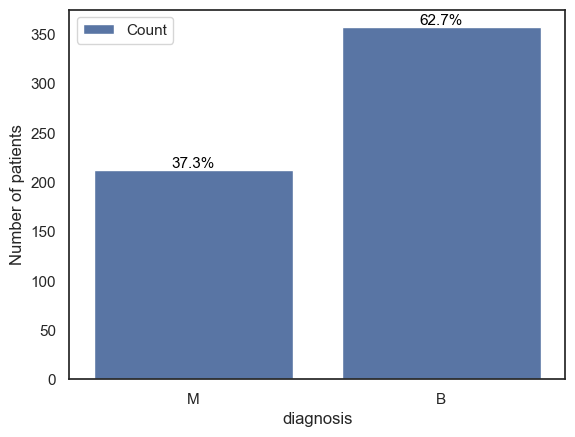

In [84]:
# Count the number of Benign and Malignant in the dataset
ax = sns.countplot(data=df, x='diagnosis', label="Count")      
B, M = df['diagnosis'].value_counts()
print('Number of Benign: ', B)
print('Number of Malignant : ', M)
ax.set_ylabel('Number of patients')
# Add percentages to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(df) * 100:.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

In [85]:
# Get the statistical summary
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


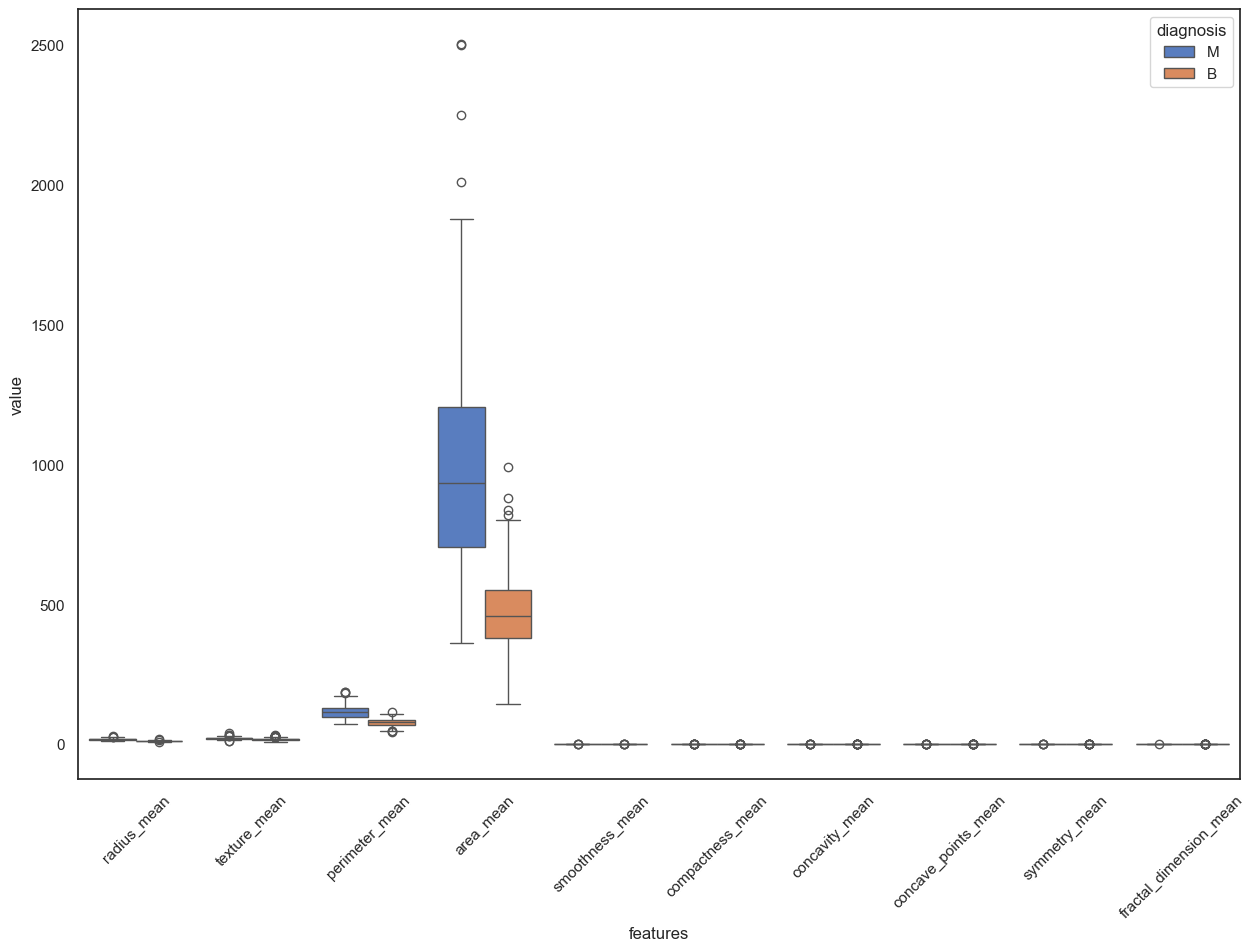

In [86]:
# Box plots are also useful in terms of seeing outliers
# first ten features
data = pd.concat([df['diagnosis'], df.iloc[:, 1:11]], axis=1) 
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette="muted")
plt.xticks(rotation=45) 
plt.show()

In [87]:
# Calculate quartiles and IQR for 'area_mean' in each class
Q1_M = df[df['diagnosis'] == 'M']['area_mean'].quantile(0.25)
Q3_M = df[df['diagnosis'] == 'M']['area_mean'].quantile(0.75)
IQR_M = Q3_M - Q1_M

Q1_B = df[df['diagnosis'] == 'B']['area_mean'].quantile(0.25)
Q3_B = df[df['diagnosis'] == 'B']['area_mean'].quantile(0.75)
IQR_B = Q3_B - Q1_B

# Identify outliers in each class
outliers_M = ((df['diagnosis'] == 'M') & ((df['area_mean'] < Q1_M - 1.5 * IQR_M) | (df['area_mean'] > Q3_M + 1.5 * IQR_M)))
outliers_B = ((df['diagnosis'] == 'B') & ((df['area_mean'] < Q1_B - 1.5 * IQR_B) | (df['area_mean'] > Q3_B + 1.5 * IQR_B)))

# Count outliers in each class
outliers_count_M = outliers_M.sum()
outliers_count_B = outliers_B.sum()

print("Number of outliers in each class:")
print("M:", outliers_count_M)
print("B:", outliers_count_B)

Number of outliers in each class:
M: 4
B: 4


In [88]:
# Remove outliers from each class
df = df[~(outliers_M | outliers_B)]

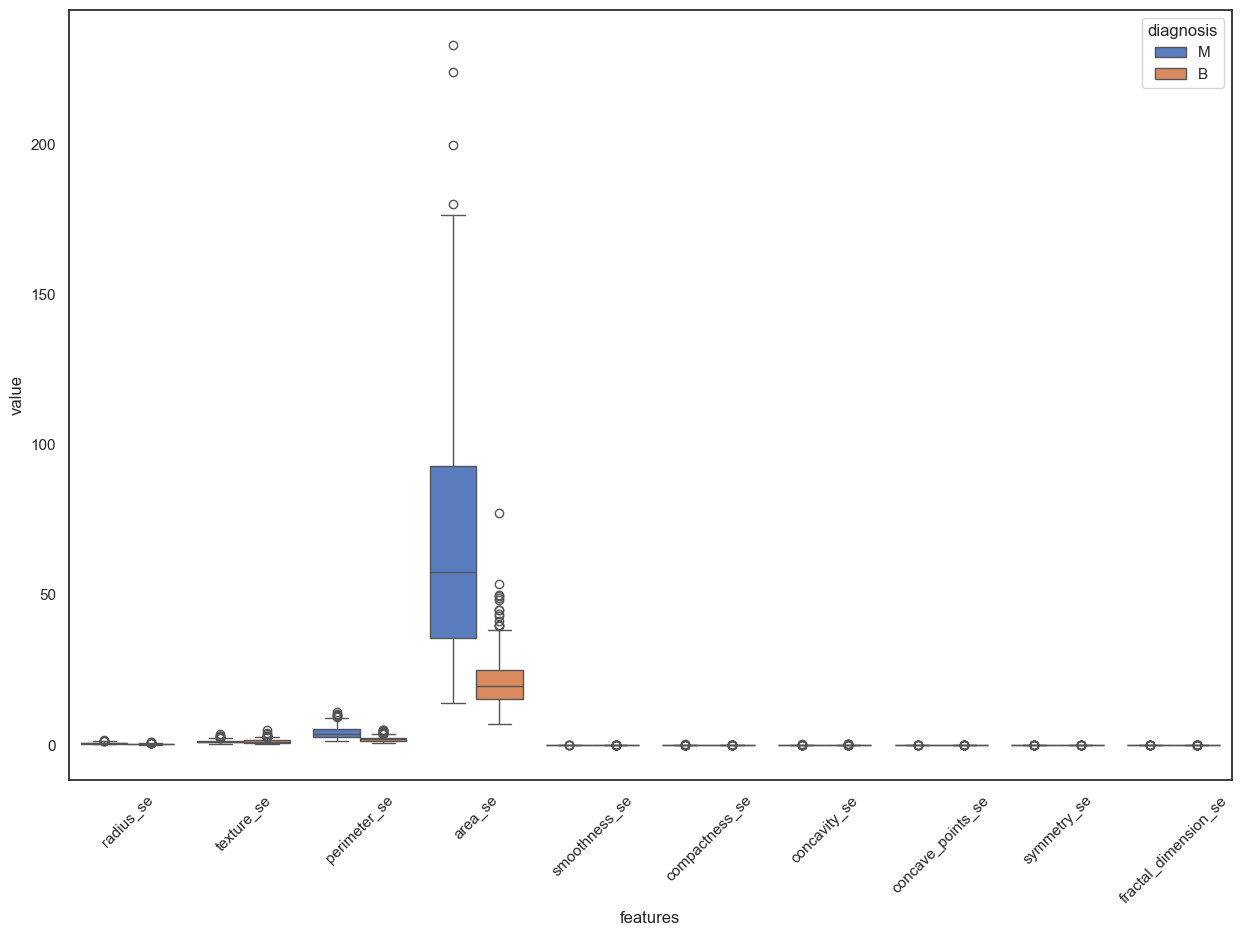

In [89]:
# Second ten features
data = pd.concat([df['diagnosis'], df.iloc[:, 11:21]], axis=1)  # Selecting first ten features from df
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette="muted")
plt.xticks(rotation=45)  # Change the rotation angle here
plt.show()

In [90]:
# Calculate quartiles and IQR for 'area_mean' in each class
Q1_M = df[df['diagnosis'] == 'M']['area_se'].quantile(0.25)
Q3_M = df[df['diagnosis'] == 'M']['area_se'].quantile(0.75)
IQR_M = Q3_M - Q1_M

Q1_B = df[df['diagnosis'] == 'B']['area_se'].quantile(0.25)
Q3_B = df[df['diagnosis'] == 'B']['area_se'].quantile(0.75)
IQR_B = Q3_B - Q1_B

# Identify outliers in each class
outliers_M = ((df['diagnosis'] == 'M') & ((df['area_se'] < Q1_M - 1.5 * IQR_M) | (df['area_se'] > Q3_M + 1.5 * IQR_M)))
outliers_B = ((df['diagnosis'] == 'B') & ((df['area_se'] < Q1_B - 1.5 * IQR_B) | (df['area_se'] > Q3_B + 1.5 * IQR_B)))

# Count outliers in each class
outliers_count_M = outliers_M.sum()
outliers_count_B = outliers_B.sum()

print("Number of outliers in each class:")
print("M:", outliers_count_M)
print("B:", outliers_count_B)

Number of outliers in each class:
M: 4
B: 14


In [91]:
# Remove outliers from each class
df = df[~(outliers_M | outliers_B)]

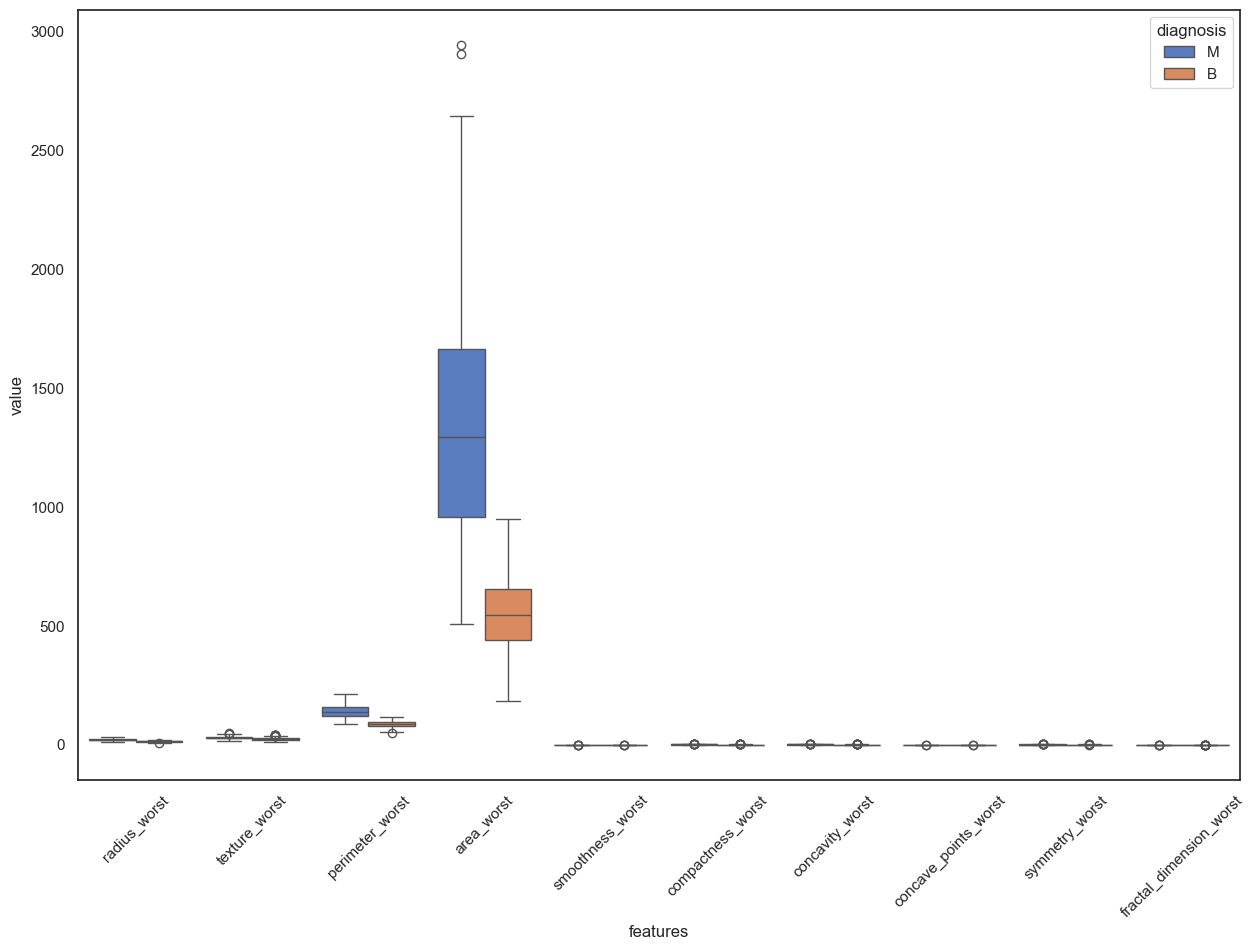

In [92]:
# Thrid ten features
data = pd.concat([df['diagnosis'], df.iloc[:, 21:31]], axis=1)  # Selecting first ten features from df
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value')
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=data, palette="muted")
plt.xticks(rotation=45)  # Change the rotation angle here
plt.show()

In [93]:
# Calculate quartiles and IQR for 'area_mean' in each class
Q1_M = df[df['diagnosis'] == 'M']['area_worst'].quantile(0.25)
Q3_M = df[df['diagnosis'] == 'M']['area_worst'].quantile(0.75)
IQR_M = Q3_M - Q1_M

Q1_B = df[df['diagnosis'] == 'B']['area_worst'].quantile(0.25)
Q3_B = df[df['diagnosis'] == 'B']['area_worst'].quantile(0.75)
IQR_B = Q3_B - Q1_B

# Identify outliers in each class
outliers_M = ((df['diagnosis'] == 'M') & ((df['area_worst'] < Q1_M - 1.5 * IQR_M) | (df['area_worst'] > Q3_M + 1.5 * IQR_M)))
outliers_B = ((df['diagnosis'] == 'B') & ((df['area_worst'] < Q1_B - 1.5 * IQR_B) | (df['area_worst'] > Q3_B + 1.5 * IQR_B)))

# Count outliers in each class
outliers_count_M = outliers_M.sum()
outliers_count_B = outliers_B.sum()

print("Number of outliers in each class:")
print("M:", outliers_count_M)
print("B:", outliers_count_B)

Number of outliers in each class:
M: 2
B: 0


In [94]:
# Remove outliers from each class
df = df[~(outliers_M | outliers_B)]

In [95]:
# check the shape of cleaned dataset.
df.shape

(541, 31)

Text(0.5, 0.9, 'Pearson correlation coefficient: 0.86\n p-value: 1.06e-157')

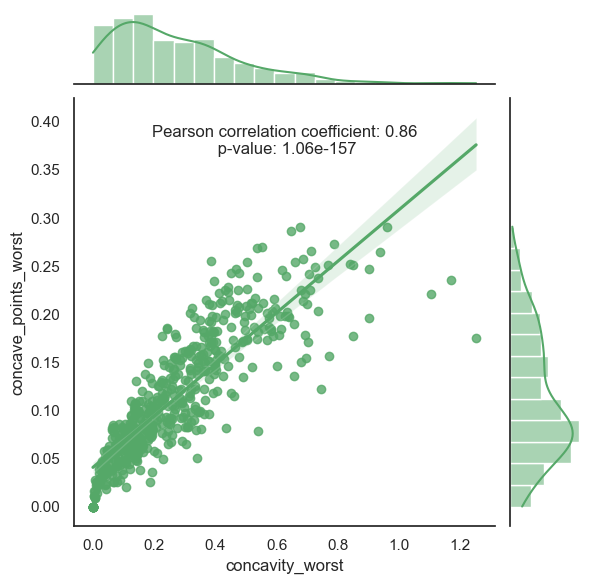

In [96]:
# Exploring data using jointplot
import scipy.stats as stats
sns.set(style="white", color_codes=True)
jp = sns.jointplot(x=df['concavity_worst'], y=df['concave_points_worst'], kind="reg", color="g")

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['concavity_worst'], df['concave_points_worst'])

# Annotate the plot with correlation coefficient and p-value
jp.ax_joint.text(0.5, 0.9, f"Pearson correlation coefficient: {pearson_coef:.2f}\n p-value: {p_value:.2e}", 
                 horizontalalignment='center', verticalalignment='center', transform=jp.ax_joint.transAxes)

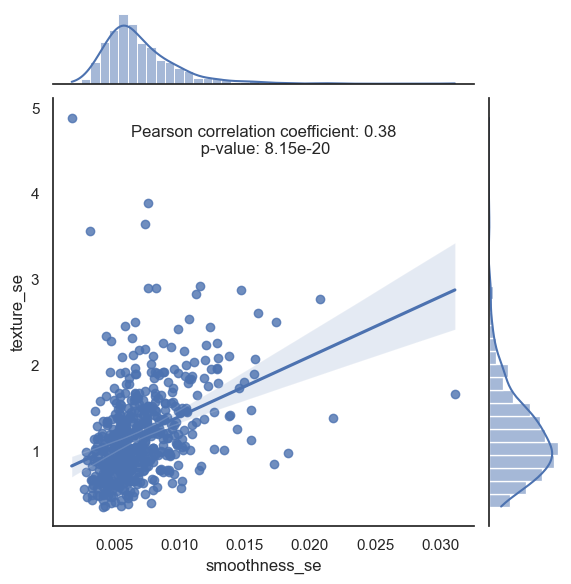

In [97]:
sns.set(style="white", color_codes=True)

# Create the jointplot
jp = sns.jointplot(x=df['smoothness_se'], y=df['texture_se'], kind="reg", color="b")

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['smoothness_se'], df['texture_se'])

# Annotate the plot with correlation coefficient and p-value
jp.ax_joint.text(0.5, 0.9, f"Pearson correlation coefficient: {pearson_coef:.2f}\n p-value: {p_value:.2e}", 
                 horizontalalignment='center', verticalalignment='center', transform=jp.ax_joint.transAxes)

plt.show()

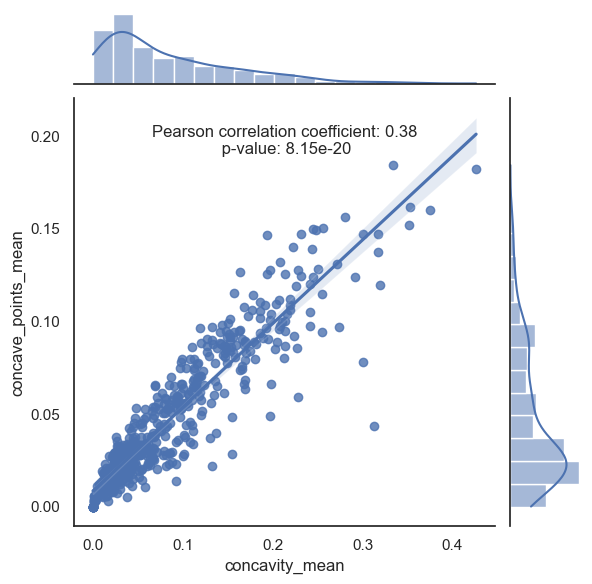

In [98]:
sns.set(style="white", color_codes=True)

# Create the jointplot
jp = sns.jointplot(x=df['concavity_mean'], y=df['concave_points_mean'], kind="reg", color="b")

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['smoothness_se'], df['texture_se'])

# Annotate the plot with correlation coefficient and p-value
jp.ax_joint.text(0.5, 0.9, f"Pearson correlation coefficient: {pearson_coef:.2f}\n p-value: {p_value:.2e}", 
                 horizontalalignment='center', verticalalignment='center', transform=jp.ax_joint.transAxes)

plt.show()

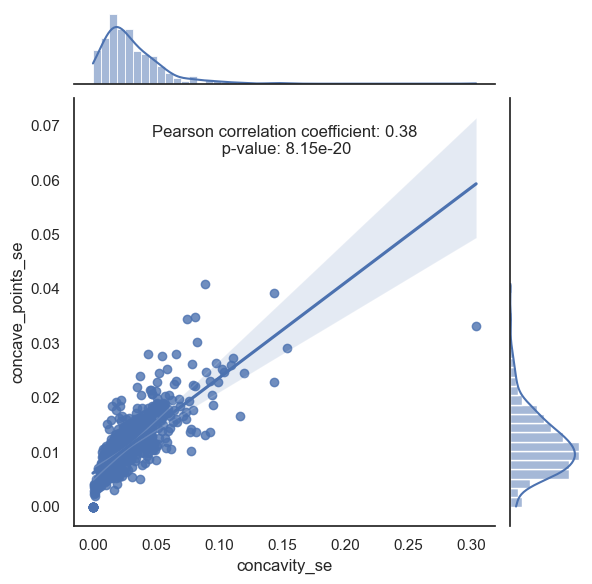

In [99]:
sns.set(style="white", color_codes=True)

# Create the jointplot
jp = sns.jointplot(x=df['concavity_se'], y=df['concave_points_se'], kind="reg", color="b")

# Calculate Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df['smoothness_se'], df['texture_se'])

# Annotate the plot with correlation coefficient and p-value
jp.ax_joint.text(0.5, 0.9, f"Pearson correlation coefficient: {pearson_coef:.2f}\n p-value: {p_value:.2e}", 
                 horizontalalignment='center', verticalalignment='center', transform=jp.ax_joint.transAxes)

plt.show()

<Axes: >

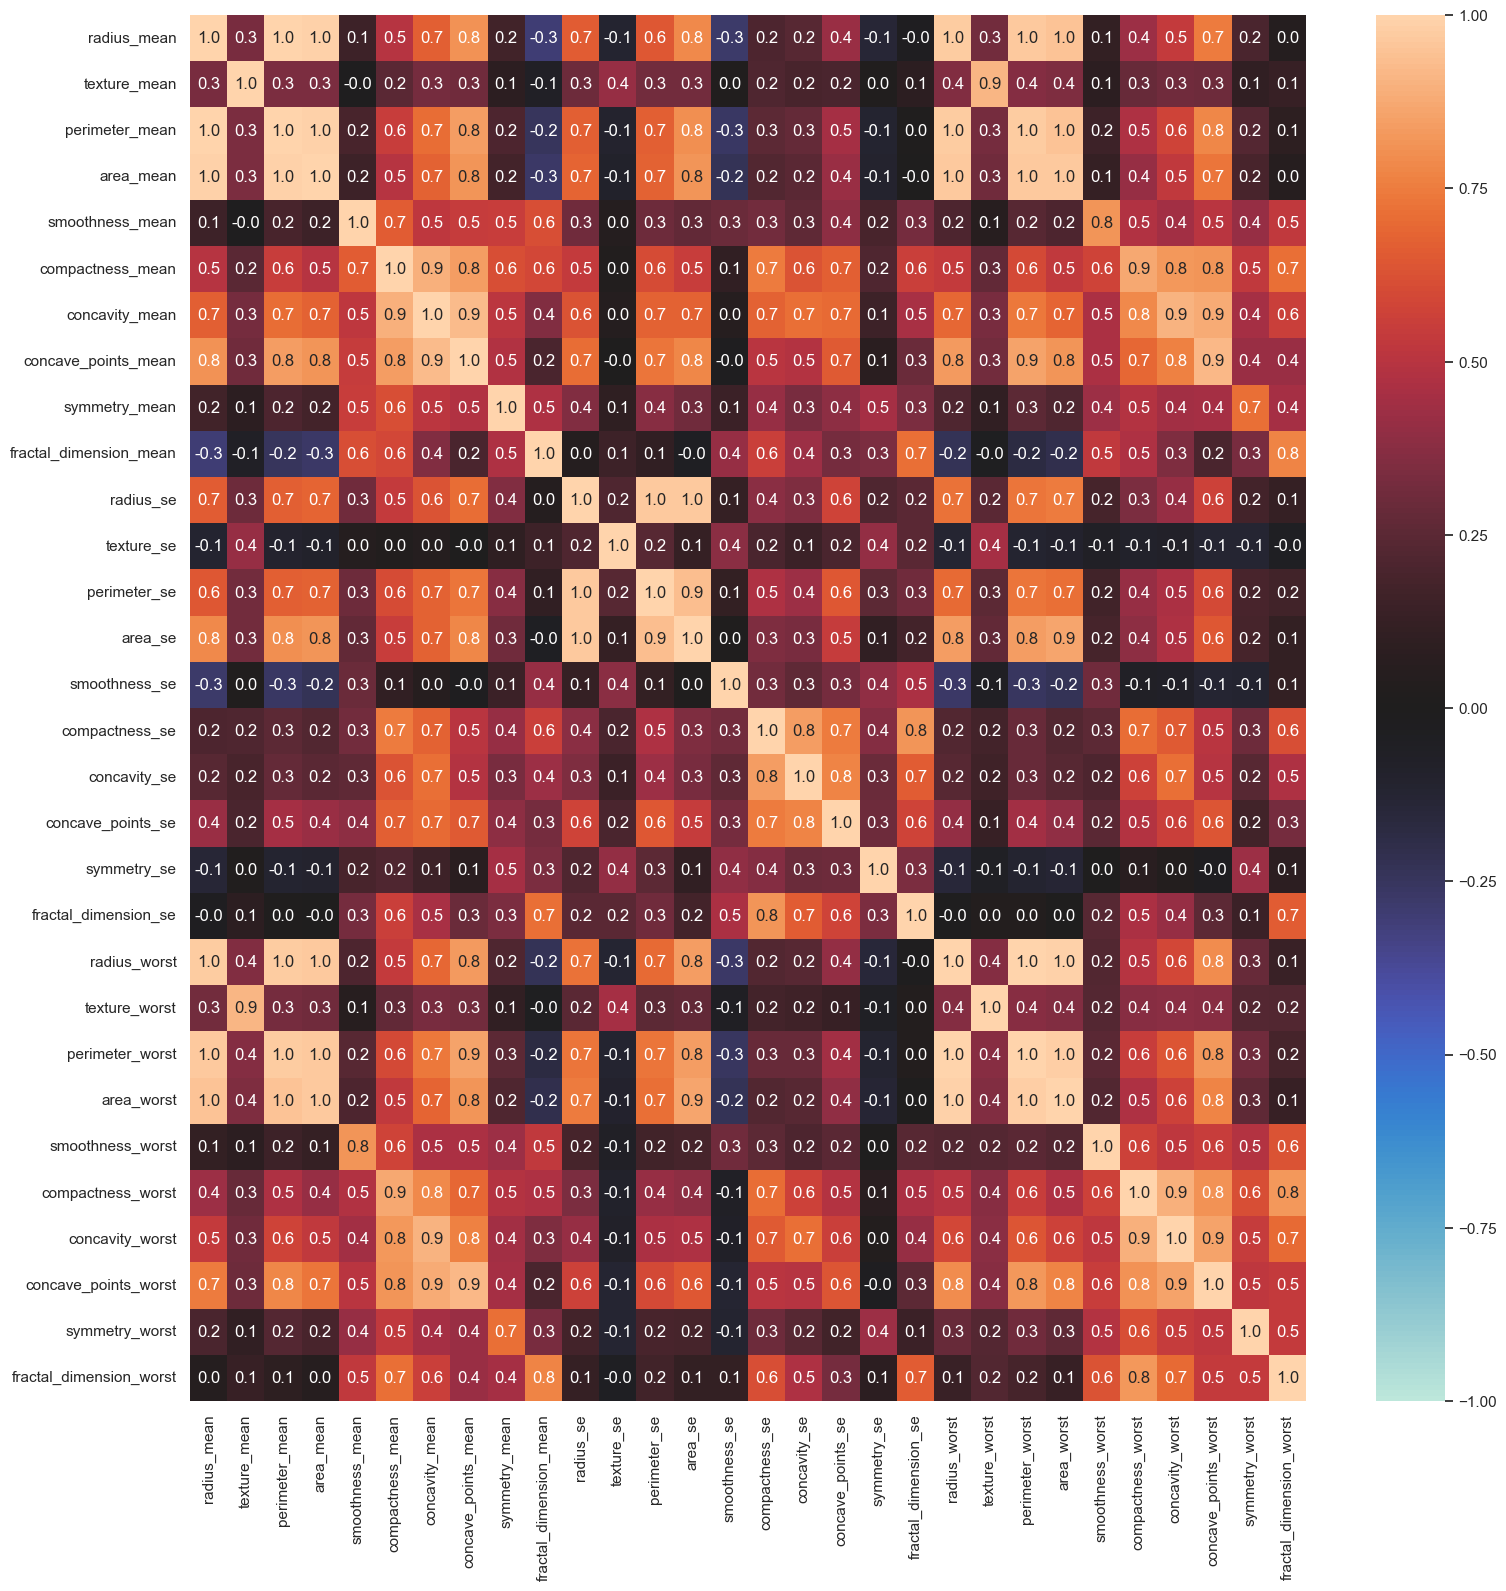

In [100]:
# Generate a heatmap based on the numerical columns of the dataframe
fig, ax = plt.subplots(figsize=(18,18)) 
matrix = np.triu(df.select_dtypes(include=[np.number]).corr())
sns.heatmap(df.select_dtypes(include=[np.number]).corr(),annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0,  ax=ax)

##### . As it can be seen in the map heat figure radius_mean, perimeter_mean, and area_mean are correlated with each other so we will use only area_mean.

##### . Compactness_mean, concavity_mean, and concave points_mean are correlated with each other.

##### . Therefore I only choose concavity_mean. 

##### . Apart from these, radius_se, perimeter_se, and area_se are correlated and I only use area_se. 

##### . Compactness_worst, concavity_worst and concave points_worst so I use concavity_worst

##### . concavity_mean, and concavity_worst so I use concavity_mean

##### . Compactness_se, concavity_,se and concave points_se so I use concavity_se

##### . texture_mean and texture_worst are correlated and I use texture_mean

##### . area_worst and area_mean are correlated, I use area_mean

In [101]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave_points_mean','concavity_worst','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave_points_worst','compactness_se','concave_points_se','texture_worst','area_worst']
df_2 = df.drop(drop_list1,axis = 1 )        
df_2.head()

,diagnosis,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
0,M,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.4601,0.11890
1,M,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2750,0.08902
2,M,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.3613,0.08758
3,M,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6638,0.17300
4,M,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.2364,0.07678


In [102]:
df_2.shape

(541, 16)

<Axes: >

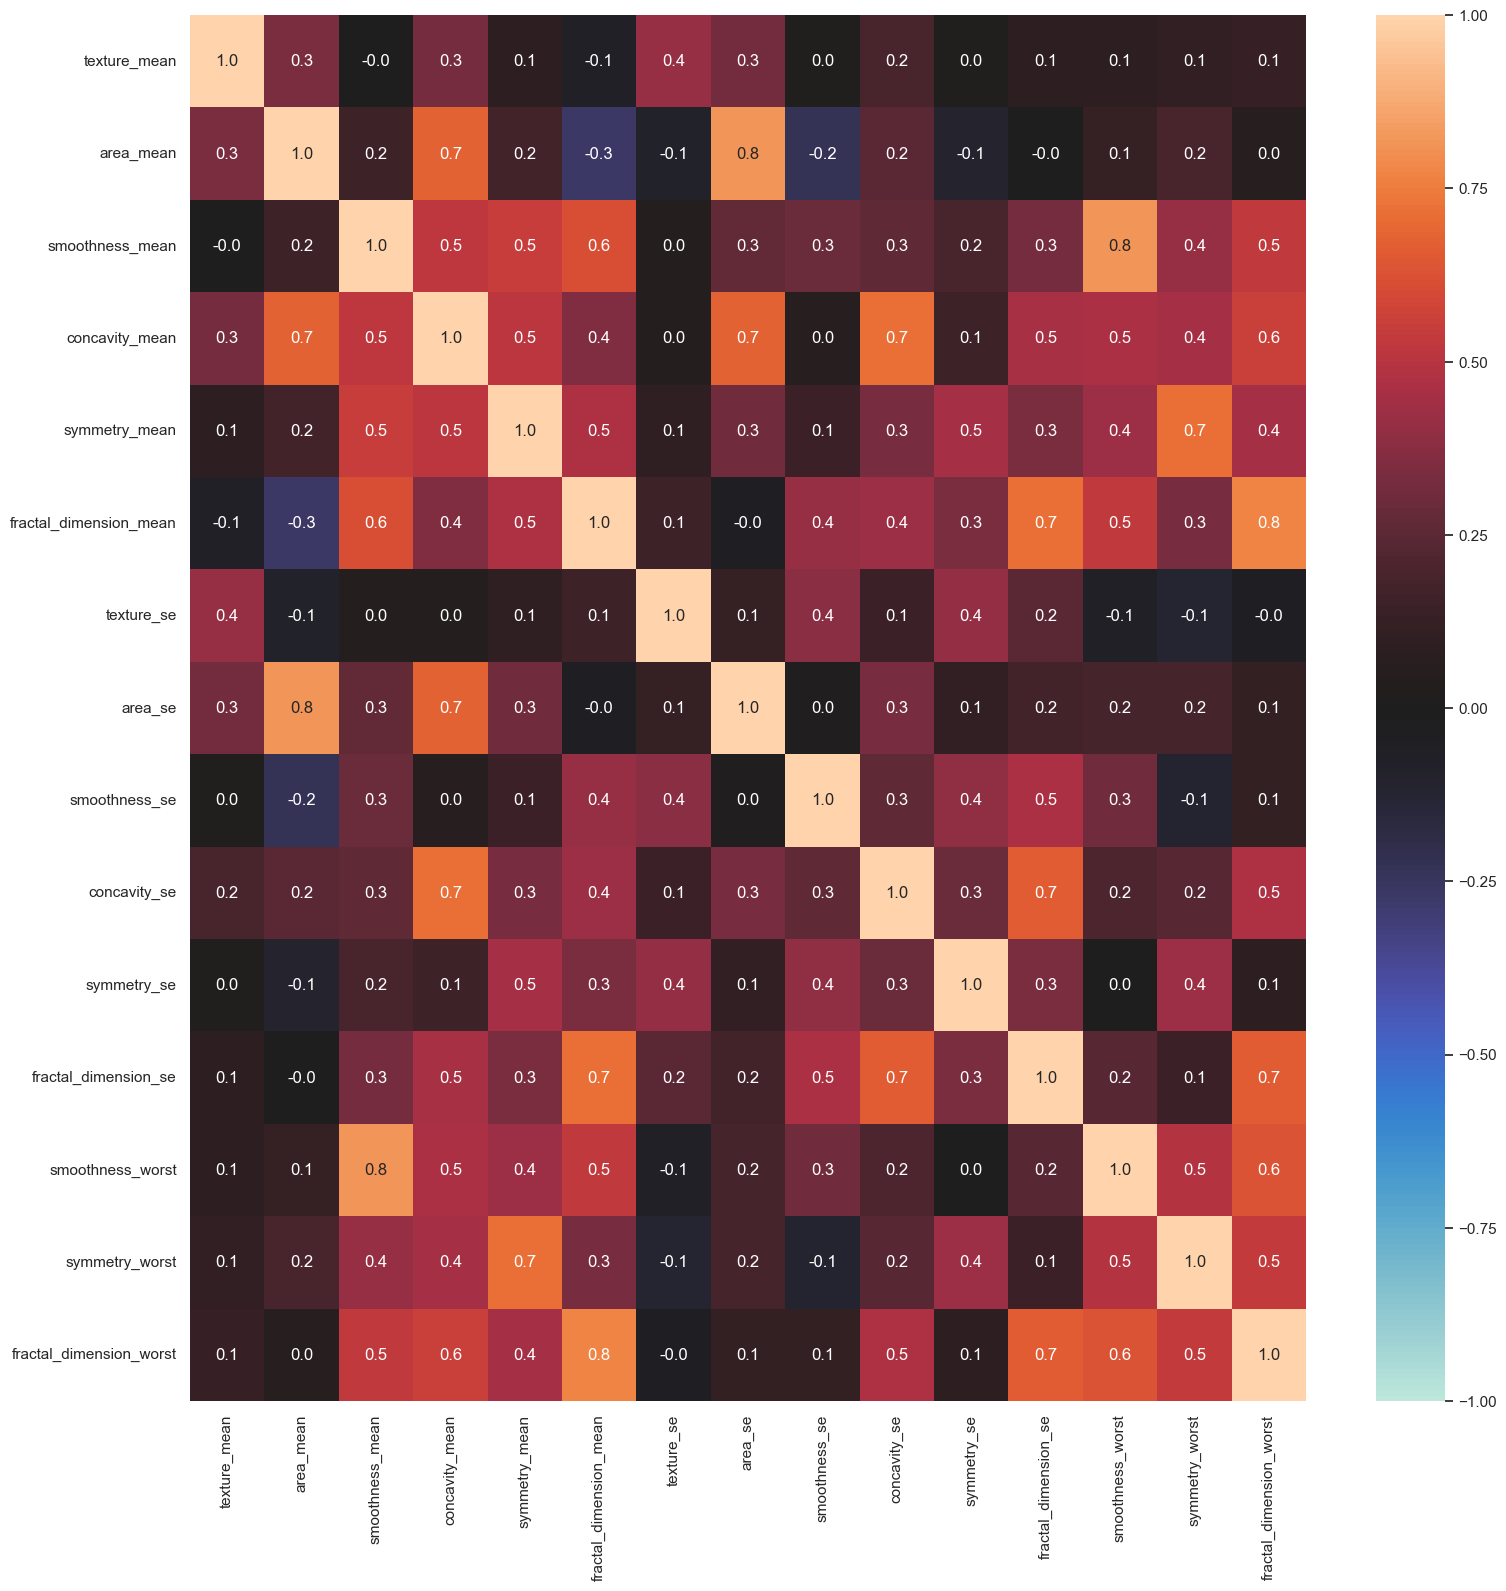

In [103]:
fig, ax = plt.subplots(figsize=(18,18)) 
matrix = np.triu(df_2.select_dtypes(include=[np.number]).corr())
sns.heatmap(df_2.select_dtypes(include=[np.number]).corr(),annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, ax=ax)

# MODEL 1

# Step 4: Divide dataset in to x and y (After drop the certain Rows)

In [104]:
# Split the columns x and y
x_2 = df_2.drop(columns=['diagnosis'])
y_2 = df_2[['diagnosis']]

In [105]:
# Basic Statistic of x and y
x_2.describe()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,symmetry_worst,fractal_dimension_worst
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,19.275712,632.848429,0.096150,0.085675,0.180778,0.062882,1.200456,36.284433,0.006994,0.030802,0.020357,0.003700,0.132698,0.291371,0.084349
std,4.285386,311.464722,0.013912,0.075597,0.027144,0.006960,0.539869,30.783144,0.002929,0.025918,0.008143,0.002278,0.022857,0.062351,0.018146
min,9.710000,143.500000,0.052630,0.000000,0.106000,0.049960,0.360200,6.802000,0.001713,0.000000,0.007882,0.000895,0.071170,0.156500,0.055040
25%,16.170000,415.100000,0.086000,0.028550,0.161800,0.058210,0.828500,17.670000,0.005158,0.014610,0.015020,0.002228,0.116800,0.251000,0.071850
50%,18.840000,538.900000,0.095860,0.059880,0.179100,0.061660,1.095000,23.520000,0.006356,0.025440,0.018700,0.003136,0.131300,0.282600,0.080190
75%,21.800000,758.600000,0.104900,0.123500,0.195300,0.066210,1.457000,41.180000,0.008124,0.040400,0.022930,0.004463,0.146300,0.319300,0.092230
max,39.280000,1878.000000,0.163400,0.426400,0.304000,0.097440,4.885000,176.500000,0.031130,0.303800,0.078950,0.021930,0.222600,0.663800,0.207500


In [106]:
y_2.describe()

,diagnosis
count,541
unique,2
top,B
freq,339


In [107]:
# Number of unique values in y column
y_2.nunique()

diagnosis    2
dtype: int64

In [108]:
# Encoding categorical data
labelencoder_X_1 = LabelEncoder()
# 'M' will be encoded as 1 and 'B' will be encoded as 0 
y_2 = labelencoder_X_1.fit_transform(y_2)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [109]:
# print the y column
print(y_2)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 

# Step 5:Splitting the dataset into the Training set and Test set (Model 1)

In [110]:
x2_train,x2_test,y2_train,y2_test = train_test_split(x_2,y_2, test_size=0.2)

In [111]:
# Check the shape of each set
print(x2_train.shape)
print(y2_train.shape)
print(x2_test.shape)
print(y2_test.shape)

(432, 15)
(432,)
(109, 15)
(109,)


# Step 6: Normalization (Model 1)

In [112]:
# Normalization the data
scaler = StandardScaler()
# Fit and transform the data
x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.fit_transform(x2_test)

# Step 7: Create the model (Model 1)

In [113]:
# Initialising the ANN
classifier = Sequential()

In [114]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=30, kernel_initializer='uniform', activation='relu', input_dim=15))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [115]:
# Adding the second hidden layer
classifier.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [116]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [117]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [118]:
# Fitting the ANN to the Training set
history2 = classifier.fit(x2_train, y2_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5317 - loss: 0.6929
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6282 - loss: 0.6910 
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6720 - loss: 0.6885 
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7174 - loss: 0.6847 
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8118 - loss: 0.6801 
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8719 - loss: 0.6712 
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9092 - loss: 0.6592 
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9261 - loss: 0.6425 
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9271 - loss: 0.6166 
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9177 - loss: 0.5894 
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9226 - loss: 0.5565 
Epoch 12/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9453 - loss

In [119]:
# Predicting the Test set results
y2_pred = classifier.predict(x2_test)
y2_pred = (y2_pred > 0.5)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E8DD2F7EC0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [120]:
cm1 = confusion_matrix(y2_test, y2_pred)

In [121]:
print(" Confusion Matrix: ")
cm1

 Confusion Matrix: 


array([[67,  2],
       [ 1, 39]], dtype=int64)

In [122]:
print("Our accuracy is ", accuracy_score(y2_test,y2_pred)*100,"%")
print("Our Precision is ", precision_score(y2_test,y2_pred)*100,"%")
print("Our Recall is ", recall_score(y2_test,y2_pred)*100,"%")
print("Our F1 Score is ", f1_score(y2_test,y2_pred)*100,"%")

Our accuracy is  97.24770642201835 %
Our Precision is  95.1219512195122 %
Our Recall is  97.5 %
Our F1 Score is  96.29629629629629 %


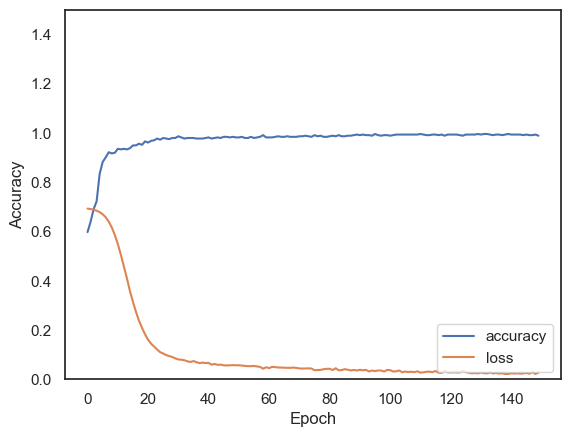

In [123]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.5])
plt.legend(loc='lower right')

# MODEL 2

# Step 4: Divide dataset in to x and y (Model 2)

In [124]:
# Split the columns x and y
x = df.drop(columns=['diagnosis'])
y = df[['diagnosis']]

In [125]:
# Basic Statistic of x and y
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,13.939216,19.275712,90.681460,632.848429,0.096150,0.103228,0.085675,0.047185,0.180778,0.062882,...,16.021884,25.732070,105.585601,845.060998,0.132698,0.254831,0.270748,0.113273,0.291371,0.084349
std,3.282012,4.285386,22.622406,311.464722,0.013912,0.052285,0.075597,0.036932,0.027144,0.006960,...,4.476655,6.102322,31.162752,494.865606,0.022857,0.158727,0.208493,0.065135,0.062351,0.018146
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.640000,16.170000,74.720000,415.100000,0.086000,0.063300,0.028550,0.019690,0.161800,0.058210,...,12.980000,21.190000,83.850000,512.500000,0.116800,0.147700,0.112500,0.064020,0.251000,0.071850
50%,13.210000,18.840000,85.690000,538.900000,0.095860,0.092280,0.059880,0.032630,0.179100,0.061660,...,14.850000,25.460000,97.110000,675.200000,0.131300,0.211900,0.226700,0.098580,0.282600,0.080190
75%,15.660000,21.800000,102.900000,758.600000,0.104900,0.129800,0.123500,0.069870,0.195300,0.066210,...,18.510000,29.870000,124.300000,1035.000000,0.146300,0.339100,0.382900,0.161300,0.319300,0.092230
max,25.220000,39.280000,171.500000,1878.000000,0.163400,0.345400,0.426400,0.184500,0.304000,0.097440,...,30.000000,49.540000,211.700000,2642.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [126]:
y.describe()

,diagnosis
count,541
unique,2
top,B
freq,339


In [127]:
# Number of unique values in y column
y.nunique()

diagnosis    2
dtype: int64

In [128]:
# Encoding categorical data
labelencoder_X_1 = LabelEncoder()
# 'M' will be encoded as 1 and 'B' will be encoded as 0 
y = labelencoder_X_1.fit_transform(y)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [129]:
# print the y column
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 0
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 

# Step 5:Splitting the dataset into the Training set and Test set (Model 2)

In [130]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [131]:
# Check the shape of each set
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(432, 30)
(432,)
(109, 30)
(109,)


# Step 6: Normalization (Model 2)

In [132]:
# Normalization the data
scaler = StandardScaler()
# Fit and transform the data
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Step 7: Create the model (Model 2)

In [133]:
# Initialising the ANN
classifier = Sequential()

In [134]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=30, kernel_initializer='uniform', activation='relu', input_shape=(30,)))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

C:\Users\acer\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
# Adding the second hidden layer
classifier.add(Dense(units=30, kernel_initializer='uniform', activation='relu'))

# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

In [136]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [137]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [138]:
# Fitting the ANN to the Training set
history = classifier.fit(x_train, y_train, batch_size=100, epochs=150)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6093 - loss: 0.6927
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9166 - loss: 0.6890 
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9369 - loss: 0.6832 
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.6731 
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9475 - loss: 0.6581 
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9533 - loss: 0.6352 
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9523 - loss: 0.6041 
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9455 - loss: 0.5604 
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9562 - loss: 0.5018 
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9573 - loss: 0.4372 
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9538 - loss: 0.3777 
Epoch 12/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9609 - loss

In [139]:
# Save the model
classifier.save("your_model.h5")

In [140]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [141]:
cm = confusion_matrix(y_test, y_pred)

In [142]:
print(" Confusion Matrix: ")
cm

 Confusion Matrix: 


array([[64,  0],
       [ 1, 44]], dtype=int64)

In [143]:
print("Our accuracy is ", accuracy_score(y_test,y_pred)*100,"%")
print("Our Precision is ", precision_score(y_test,y_pred)*100,"%")
print("Our Recall is ", recall_score(y_test,y_pred)*100,"%")
print("Our F1 Score is ", f1_score(y_test,y_pred)*100,"%")

Our accuracy is  99.08256880733946 %
Our Precision is  100.0 %
Our Recall is  97.77777777777777 %
Our F1 Score is  98.87640449438202 %


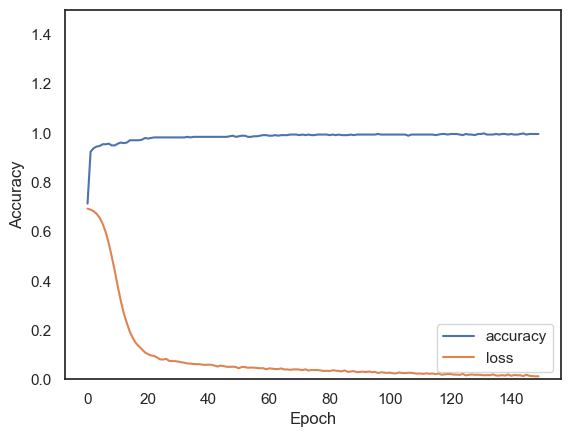

In [144]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1.5])
plt.legend(loc='lower right')